<a href="https://colab.research.google.com/github/cdstreiff/MAT421---Applied-Computational-Methods/blob/main/MAT421SectionB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Section B HW - MAT421
Questions based off of chapter 17 of the text.

## Problem 1: Linear Interpolation
This code will find the linear interpolation of a supplied array, given certain experimental data points.

In [28]:
def my_lin_interp(x,y,X):

  Y = [0]*len(X)

  #iterate through X
  for i in range(0,len(X),1):
    
    #find smallest number in x that current point is larger than 
    # print(X[i])
    j = 0
    while x[j] < X[i]:
      j += 1

    x1 = x[j-1]
    x2 = x[j]
    # print("X value between " + str(x1) + " and " + str(x2))
    y1 = y[j-1]
    y2 = y[j]
    
    answer = y1 + ( ((y2 - y1)*(X[i] - x1)) / (x2 - x1) )
    # print("y value " + str(answer))

    Y[i] = answer
  return Y

my_lin_interp([0,1,2],[1,3,2],[0.5,1,1.5,1.75])


[2.0, 3.0, 2.5, 2.25]

## Problem 2: Cubic Spline
This program will return the cubic spline interpolation of a supplied set of points (in its domain). Again this interpolation is based on a set of provided experimental points. Here we see a graphical representation of this cubic spline (plotted in MATLAB). It is very elegant how each function gently leads into the next.


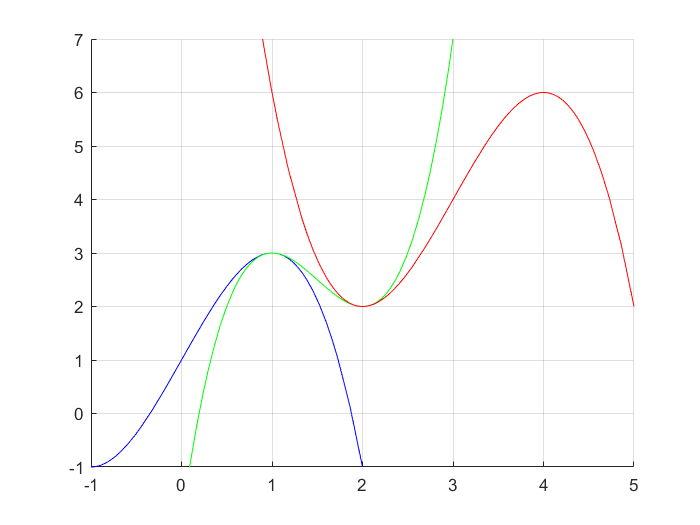

In [231]:
def my_cubic_spline(x,y,X):

  #number of equations
  n = len(x)
  dim = ((n-1)*4,(n-1)*4)
  A = np.zeros(dim)
  b = np.ones(4*(n-1))

  #rowcount - important for keeping track of which equation we are on
  rowcount = 0
  


  #build first constraint
  dim1 = (n-1,4*(n-1))
  A1 = np.zeros(dim1)

  startpoint = 0;
  for i in range(0,n-1,1):
    power = 3
    for j in range(startpoint,startpoint+4,1):
      A1[i,j] = x[i]**power
      power -= 1
    startpoint += 4
    b[i] = y[i]
    rowcount += 1


  #build second constraint
  dim2 = (n-1,4*(n-1))
  A2 = np.zeros(dim2)
  
  startpoint = 0;
  for i in range(0,n-1,1):
    power = 3
    for j in range(startpoint,startpoint+4,1):
      A2[i,j] = x[i+1]**power
      power -= 1
    startpoint += 4
    b[i+(n-1)] = y[i+1]
    rowcount += 1

  

  #third constraint
  dim3 = (n-2,4*(n-1))
  A3 = np.zeros(dim3)
  
  for i in range(0,n-2,1):
    

      A3[i,0+4*i] = 3 * (x[i+1]**2)
      A3[i,1+4*i] = 2 * x[i+1]
      A3[i,2+4*i] = 1

      A3[i,4 + 4*i] = -3 * (x[i+1]**2)
      A3[i,5 + 4*i] = -2 * x[i+1]
      A3[i,6 + 4*i] = -1
      b[rowcount] = 0
      rowcount += 1
  

  #fourth constraint
  dim4 = (n-2,4*(n-1))
  A4 = np.zeros(dim4)
  
  
  for i in range(0,n-2,1):
    
      A4[i,0+4*i] = 6 * (x[i+1])
      A4[i,1+4*i] = 2

      A4[i,4 + 4*i] = -6 * (x[i+1])
      A4[i,5 + 4*i] = -2
      b[rowcount] = 0
      rowcount += 1

  
  #fifth constraint
  dim5 = (2,4*(n-1))
  A5 = np.zeros(dim5)

  A5[0,0] = 6 * x[0]
  A5[0,1] = 2
  A5[1,4*(n-2)] = 6 * x[n-1]
  A5[1,4*(n-2) + 1] = 2

  b[rowcount] = 0
  rowcount += 1
  b[rowcount] = 0
  rowcount += 1

  #initialize final matrix representing the system of equations

  dim = (len(b),len(b))
  A = np.zeros(dim)

  #concatenating all the result matrices together
  row = 0
  for i in range(0,len(A1),1):
    A[i,:] = A1[i,:]
    row += 1
  offset = row
  for i in range(0,len(A2),1):
    A[i+offset,:] = A2[i,:]
    row += 1
  offset = row
  for i in range(0,len(A3),1):
    A[i+offset,:] = A3[i,:]
    row += 1
  offset = row
  for i in range(0,len(A4),1):
    A[i+offset,:] = A4[i,:]
    row += 1
  offset = row
  for i in range(0,len(A5),1):
    A[i+offset,:] = A5[i,:]
    row += 1

  
  #solving the system of equatons using the numPy built in functions to get coefficients of our cubic equations

  coef = np.dot(np.linalg.inv(A), b)
  print("Coefficients: ")
  print(coef)



  #evaluating at the given points
  Y = [0] * len(X)
  for i in range(0,len(X),1):
    j = 0
    while x[j] < X[i]:
      j += 1
    index = j-1
    
    term1 = coef[4*index]
    term2 = coef[4*index + 1]
    term3 = coef[4*index + 2]
    term4 = coef[4*index + 3]

    
    Y[i] = term1 * (X[i] ** 3) + term2 * (X[i]**2) + term3 * X[i] + term4
  print("Interpolation:")
  return Y

#should return points congruent with the graph
my_cubic_spline([0,1,2,3],[1,3,2,4],[0.2,0.5,1.5,2.4,2.9])

Coefficients: 
[ -1.   0.   3.   1.   2.  -9.  12.  -2.  -1.   9. -24.  22.]
Interpolation:


[1.591999999999998,
 2.3749999999999987,
 2.500000000000009,
 2.416000000000018,
 3.701000000000029]

## Problem 3: Lagrange Interpolation
This program takes a set of x-values, along with some experimental coordinates, and finds the corresponding y-values calculated using Lagrange interpolation. The code works for any amount of points.

In [274]:
def my_lagrange(x,y,X):
  values = [0] * len(X)
  #for each value in the X list
  for i in range(0,len(X),1):

    #this sum represents the final lagrange polynomial
    sum = 0



    #which basis polynomial we're on
    for j in range(0,len(x),1):
      

      product = 1
      #evaluate terms in that basis polynomial
      for g in range(0,len(x),1):
        
        if g != j:
          product *= ((X[i] - x[g]) / (x[j] - x[g]))

      #add that term x the y values to the sum
      sum += product*y[j]
    values[i] = sum
  return values
      

      
my_lagrange([0,1,2],[1,3,2],[0.5,1.75,2.5,3])

[2.375, 2.53125, 0.375, -2.0]

## Testing the Lagrange interpolation
This code tests the Lagrange interpolation function written in problem 3. The experimental points can be edited, as well as the range of the plot. Experimental points are marked in red.

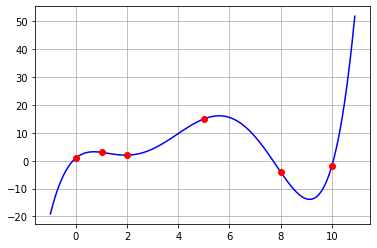

In [294]:
import matplotlib.pyplot as plt
x_points = [0,1,2,5,8,10]
y_points = [1,3,2,15,-4,-2]
x_range = np.arange(-1.0,11,0.1)

y_new = my_lagrange(x_range,y_points,x_values)

plt.plot(x_values,y_new,'b',x_points,y_points,'ro')
plt.grid()

## Problem 4: Newton's Polynomial Interpolation
Implementation of Newton interpolation. Values can be adjusted to compare to the Lagrange method.

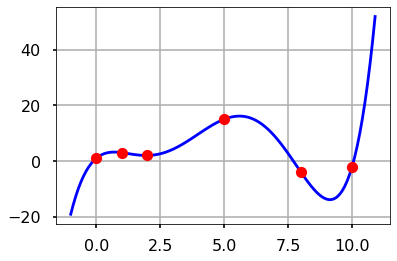

In [369]:
def divided_diff(x,y):
  n = len(y)
  coef = np.zeros([n,n])


  #first column is y values
  coef[:,0] = y
  

  for i in range(1,n):
    for j in range(n-i):
      
      coef[j,i] = (coef[j+1,i-1] - coef[j,i-1]) / (x[j+i] - x[j])
      
  return coef

#pass one number at a time
def newton_interp(coef,x_values,x):

  y = [0] * len(x)
  for j in range(0,len(x)):
    n = len(x_values) - 1
    
    sum = coef[0,n]
    #iterate backwards through the coefficients, building the value of f(x)
    for i in range(1,n+1):
      sum = coef[0,n-i] + (x - x_values[n-i])*sum
    y[j] = sum
  return y

x = [0,1,2,5,8,10]
y = [1,3,2,15,-4,-2]
coef = divided_diff(x,y)

x_new = np.arange(-1,11,0.1)
y_new = newton_interp(coef,x,x_new)
plt.plot(x_new,y_new[0],'b',x,y,'ro')
plt.grid()